# Maestria en Ciencia de Datos

## Machine Learning 1

### Guia 3

### Maria Angélica Robayo Torres

- Reducción de dimensionalidad usando ACP.- 
Definición de clústeres según hábitos y contraste con la variable objetivo. 

0. Inicialmente importaremos las librerías necesarias para analizar el conjunto de datos.

In [3]:
# Primero se importaran las librerias requeridas para el tratamiento de la información, pandas, matplotlib, seaborn y plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.cluster import KMeans

1. Cargue del conjunto de datos

In [5]:
df = pd.read_csv ('ObesityDataSet_raw_and_data_sinthetic.csv')

In [6]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [7]:
# Información del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

El conjunto de datos tiene en total 17 variables de las cuales 8 son de tipo numerico y 9 son variables categoricas.

2. Exploración de las variables del conjunto de datos

Para esta parte crearemos dos funciones que nos permitiran gráficar las variables categoricas y las variable numericas, para las variables categoricas se crearan gráficos de conteos por categorias, para las numericas gráficas de distribución que muestran la linea de la media y de la mediana de los datos respectivamente. 

In [10]:
# Para realizar una exploración de los datos realizaremos una función que nos permitira generar diagramas de las variables categoricas (object).
def count_values(dataset, cat_variable, order = None):
   
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Numero de ítems en cada categoria de la variable {cat_variable}")
    plt.show()

C:\Users\Maria Robayo\AppData\Local\Temp\ipykernel_31384\2888225569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


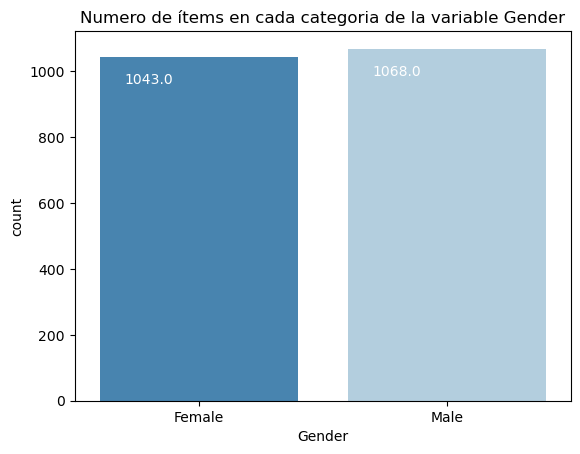

In [11]:
# Gráfico de la variable Genero
count_values(df, "Gender")

C:\Users\Maria Robayo\AppData\Local\Temp\ipykernel_31384\2888225569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


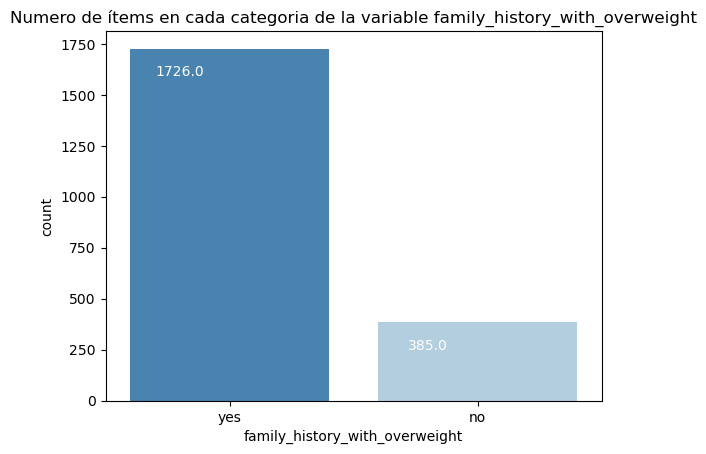

In [12]:
# Gráfico de la variable antecedente familiar de sobrepeso
count_values(df, "family_history_with_overweight")

C:\Users\Maria Robayo\AppData\Local\Temp\ipykernel_31384\2888225569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


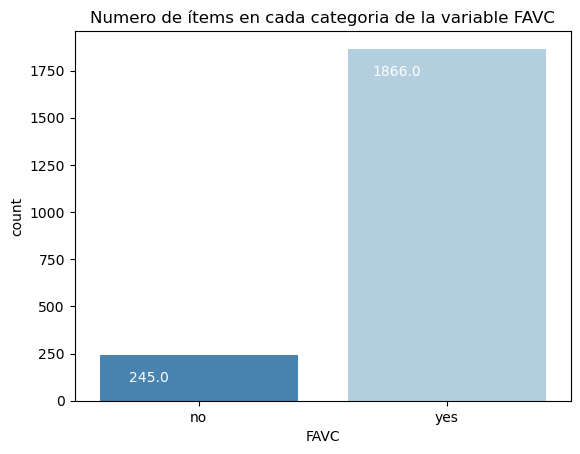

In [13]:
# Gráfico de la variable consumo frecuente de alimentos de alto valor calorico
count_values(df, "FAVC")

C:\Users\Maria Robayo\AppData\Local\Temp\ipykernel_31384\2888225569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


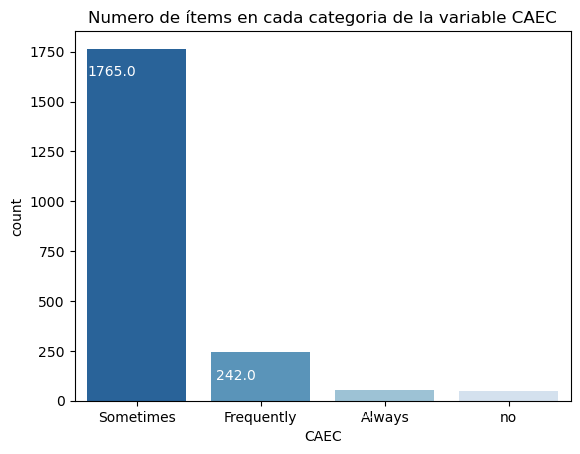

In [14]:
# Gráfico de la variable consumo de alimentos entre comidas
count_values(df, "CAEC")

C:\Users\Maria Robayo\AppData\Local\Temp\ipykernel_31384\2888225569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


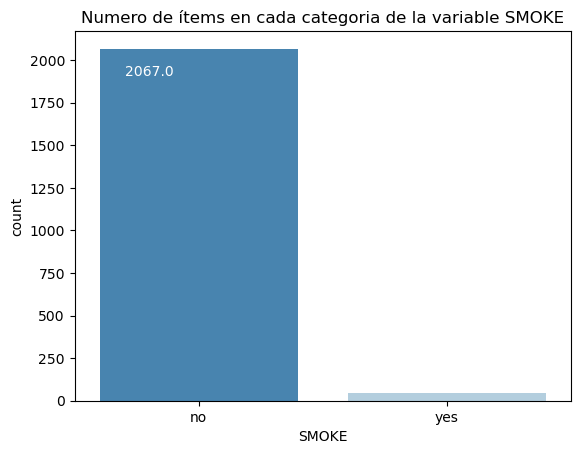

In [15]:
# Gráfico de la variable fumar
count_values(df, "SMOKE")

C:\Users\Maria Robayo\AppData\Local\Temp\ipykernel_31384\2888225569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


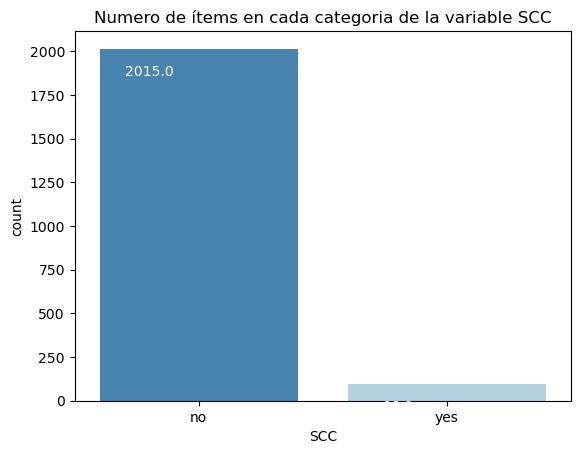

In [16]:
# Gráfico de la variable monitoreo de calorias consumidas
count_values(df, "SCC")

C:\Users\Maria Robayo\AppData\Local\Temp\ipykernel_31384\2888225569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


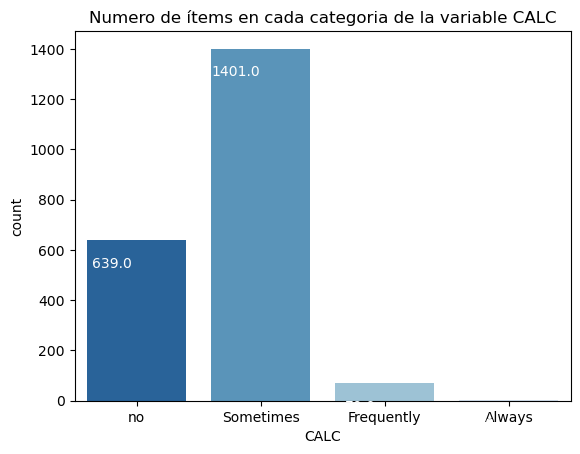

In [17]:
# Gráfico de la variable consumo de alcohol
count_values(df, "CALC")

C:\Users\Maria Robayo\AppData\Local\Temp\ipykernel_31384\2888225569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


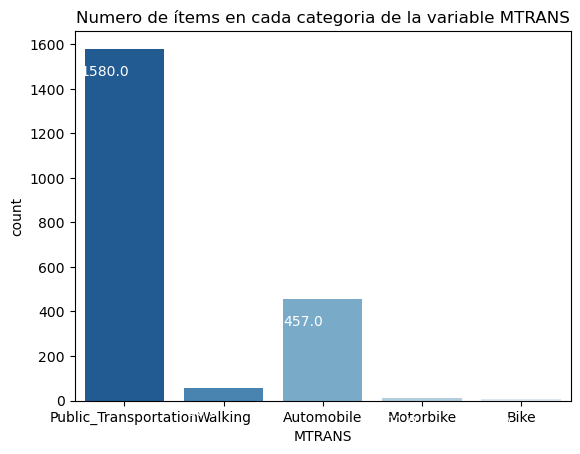

In [18]:
# Gráfico de la variable medio de transporte utilizado
count_values(df, "MTRANS")

C:\Users\Maria Robayo\AppData\Local\Temp\ipykernel_31384\2888225569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


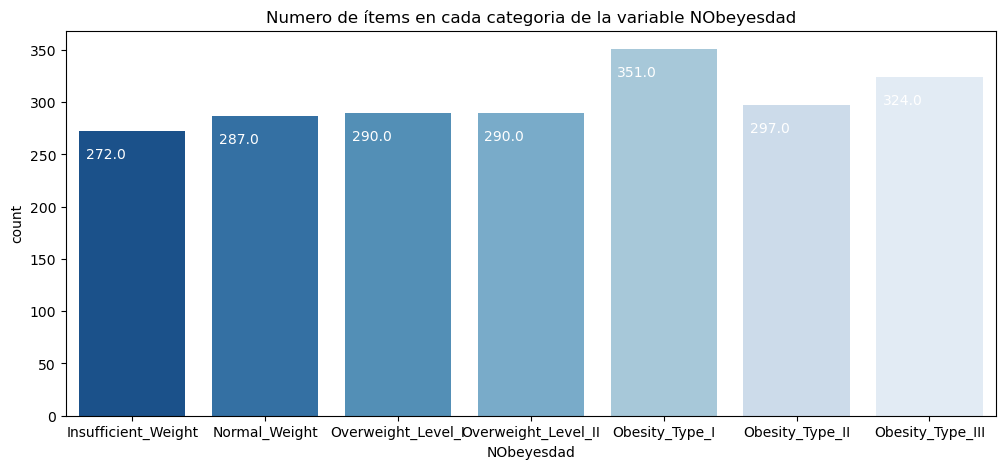

In [19]:
# Gráfico de la variable Nivel de obesidad
plt.figure(figsize = (12, 5))
count_values(df, "NObeyesdad", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

In [20]:
# Ahora utilizaremos una función que nos permitira generar diagramas de las variables continuas (float64) que además nos muestre la linea de la media y la mediana.
def plot_distribution(dataset, feature):

    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "media")
    plt.axvline(dataset[feature].median(), color = "orange", label = "mediana")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribución de los valores de la variable {feature}")
    plt.show()

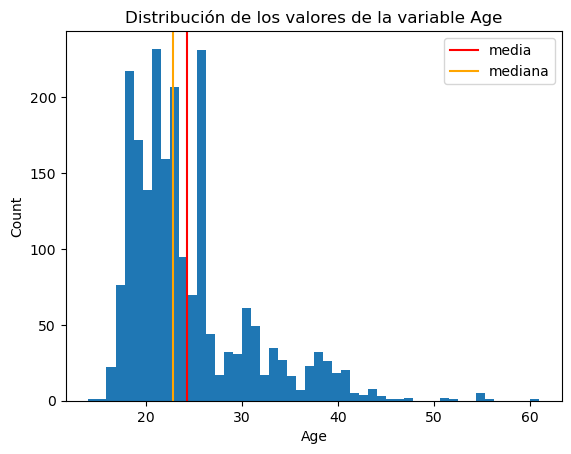

In [21]:
# Gráfico de la variable Edad
plot_distribution(df, "Age")

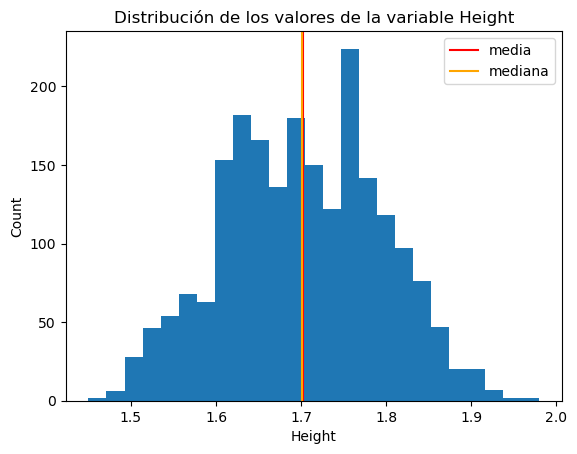

In [22]:
# Gráfico de la variable Estatura
plot_distribution(df, "Height")

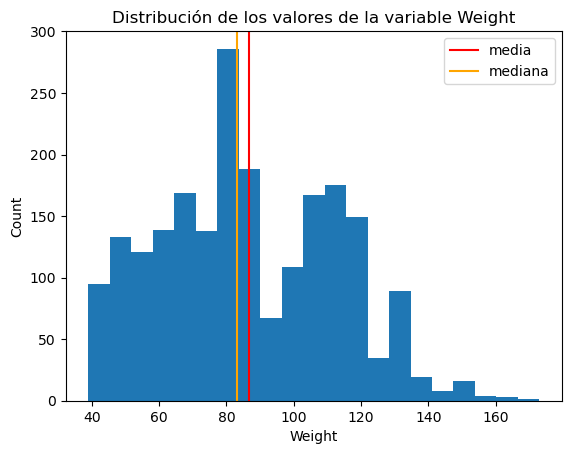

In [23]:
# Gráfico de la variable Peso
plot_distribution(df, "Weight")

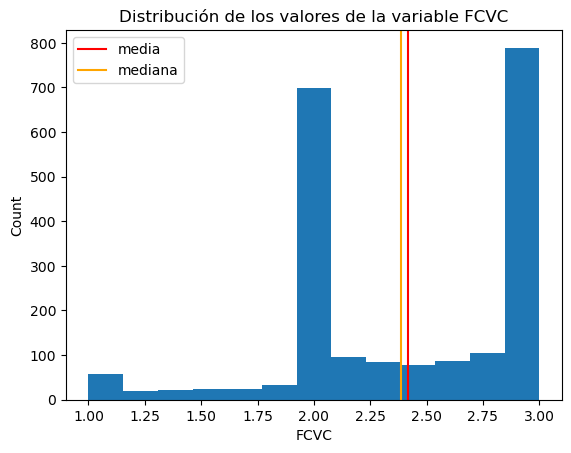

In [24]:
# Gráfico de la variable frecuencia de consumo de vegetales en las comidas
plot_distribution(df, "FCVC")

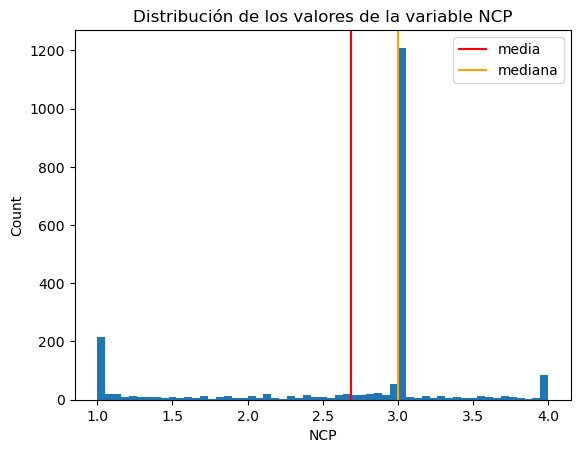

In [25]:
# Gráfico de la variable numero de comidas principales
plot_distribution(df, "NCP")

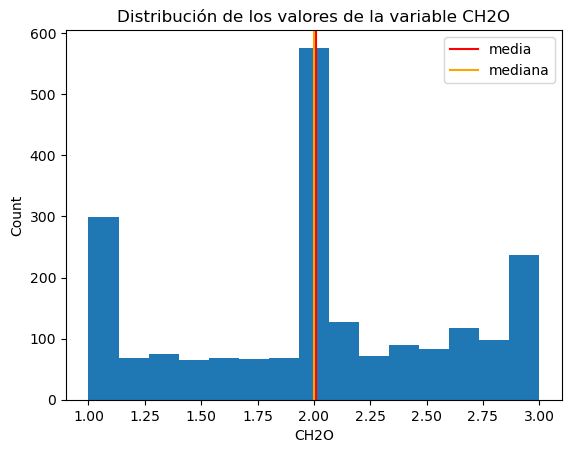

In [26]:
# Gráfico de la variable consumo de agua
plot_distribution(df, "CH2O")

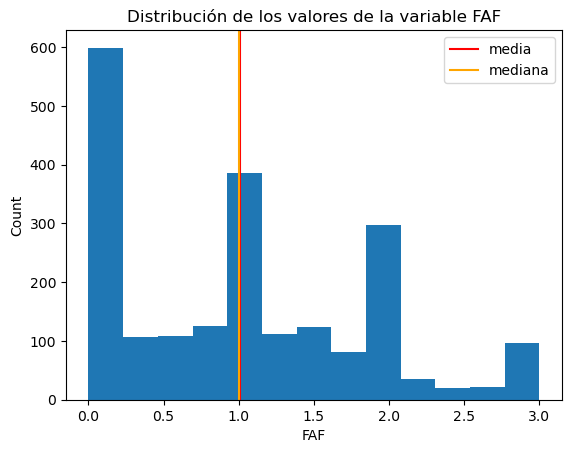

In [27]:
# Gráfico de la variable frecuencia de actividad fisica
plot_distribution(df, "FAF")

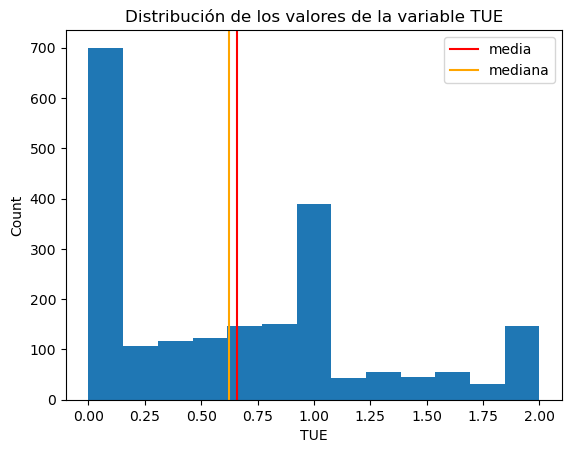

In [28]:
# Gráfico de la variable tiempo de uso de dispositivos tecnologicos
plot_distribution(df, "TUE")

Observaciones sobre la exploracion de variables:

- En cuanto a la variable genero los datos estan equilibrados, es decir existen cantidades similares de mujeres y de hombres en el conjunto de datos.
- En cuanto a la variable edad, el registro de menor edad es de 14 y el mayor de 61, se observa un sesgo positivo en la distribución.
- En cuanto a la variable estatura la mayoria de datos se concentran entre 1,6 y 1,8 y los valores de media y mediana son muy cercanos.
- En cuanto a la variable peso, se aprecia una aproximación a una distribución bimodal, sin embargo, los valores de la media y la mediana se acercan mucho a los 80 Kg.
- La mayoria de personas en la muestra tienen antecedentes familiares de sobrepeso.
- La mayoria de personas en la muestra consumen alimentos con alto contenido calorico.
- Para la variable relacionada con el consumo de vegetales se tienen tres valores posibles, sin embargo se observan datos en medio que generan un poco de ruido, las opciones deberian ser "nunca", "a veces" y "siempre", los numeros 1, 2 y 3 deberian corresponder con estas categorias, en este caso la mayoria de personas incluyen vegetales en sus comidas (a veces y siempre).
- Para la variable numero de comidas por dia se tienen tres valores posibles, sin embargo se observan datos en medio que generan un poco de ruido, las opciones deberian ser "Entre 1 y 2", "3" y "más de tres", los numeros 1, 3 y 4 deberian corresponder con estas categorias, en este caso la mayoria de personas tienen 3 comidas principales.
- La mayoria de personas en la muestra consumen alimentos entre las comidas principales.
- La mayoria de personas son No fumadores.
- Para la variable de consumo de agua pasa lo mismo que para e consumo de vegetales, en este caso se puede interpretar que la mayoria de personas beben entre 1 y 2 litros de agua.
- La mayoria de personas no monitorean el consumo de calorias.
- Con respecto a la actividad fisica pasa lo mismo que para el consumo de vegetales, pero en ese caso son 4 opciones, no hace, 1-2 dias, 2-4 dias, 4-5 dias. Teniendo en cuenta lo que se ha dicho previamente podria decirse que solo una pequeña parte de la muestra hace ejercicio 4-5 días en la semana.
- Lo mismo pasa con el uso de dispositivos tecnologicos, las opciones deberian ser 0–2 horas (1), 3–5 horas (2) y más de 5 horas (3), por lo que se podria inferir que la mayoria de personas usan dispositivos electronicos entre 0 y 5 horas.
- La mayoria de personas no consumen alcohol o si lo hacen es algunas veces.
- El medio de transporte que más utilizan las personas es el transporte publico o el automovil.
- El gráfico de la variable objetivo muestra que el conjunto de datos esta equilibrado, hay cantidades similares para cada una de las categorias o niveles de obesidad definidos.

3. Estadisticas

In [31]:
# Revisaremos algunas estadisticas basicas para las variables numericas del conjunto de datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [32]:
df_numeric = df[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]

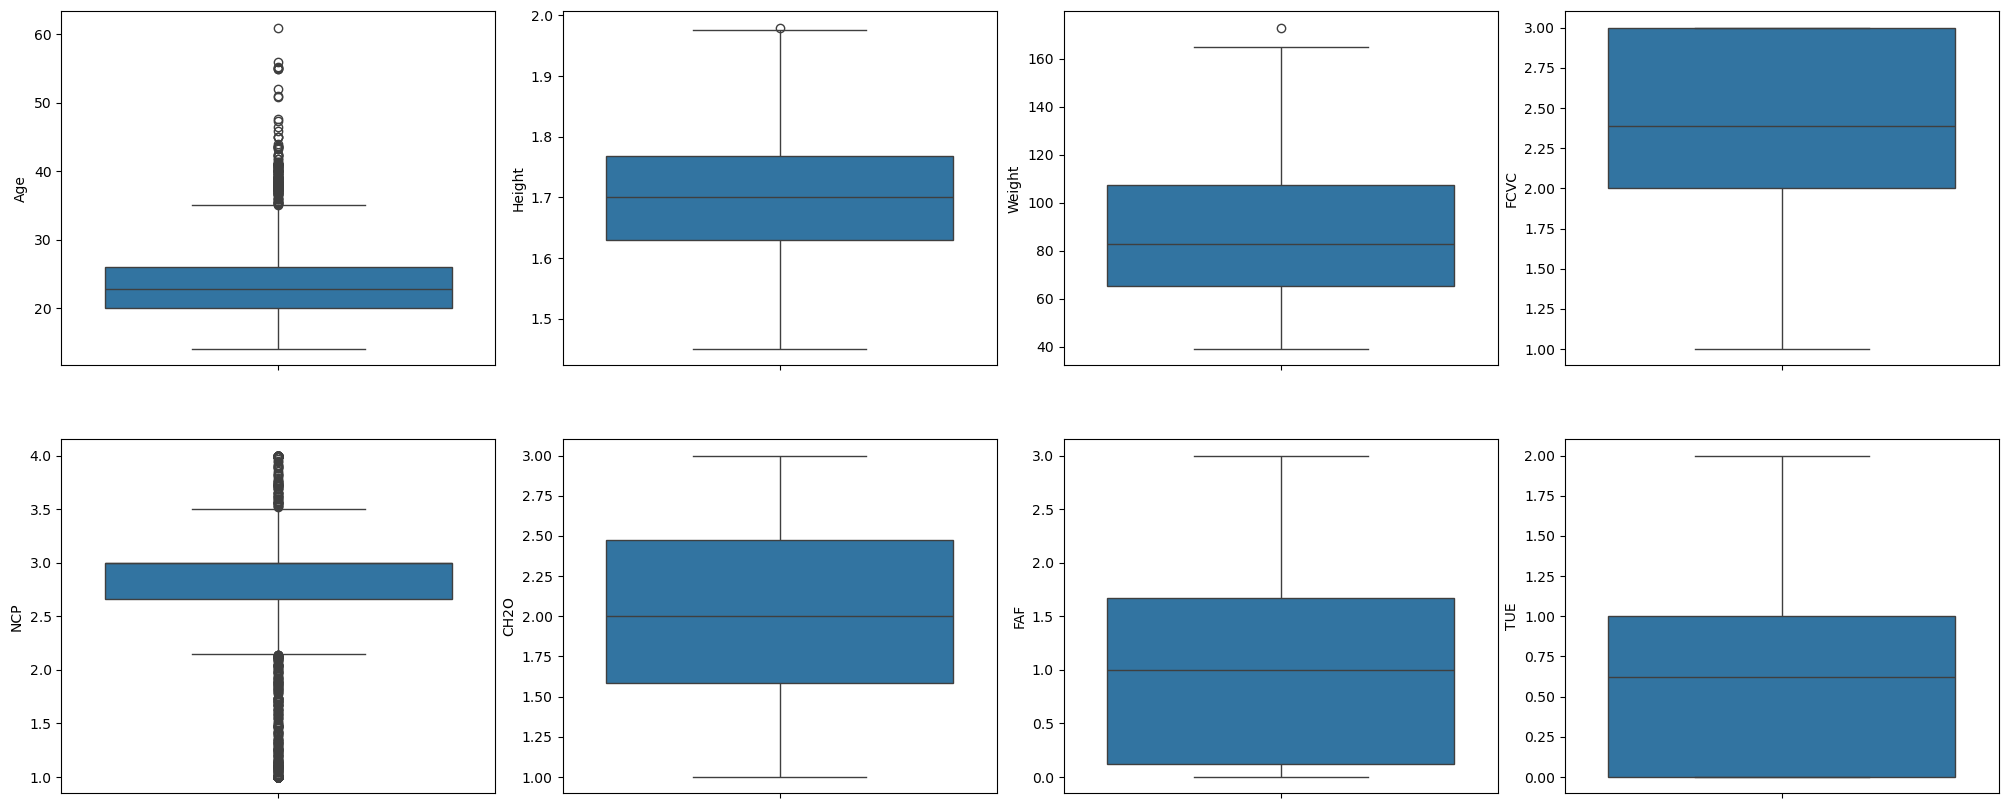

In [33]:
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 8))
# fig.delaxes(axs[1][3])
idx = 0
axs = axs.flatten()
for k, v in df_numeric.items():
    sns.boxplot(y = k, data = df_numeric, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

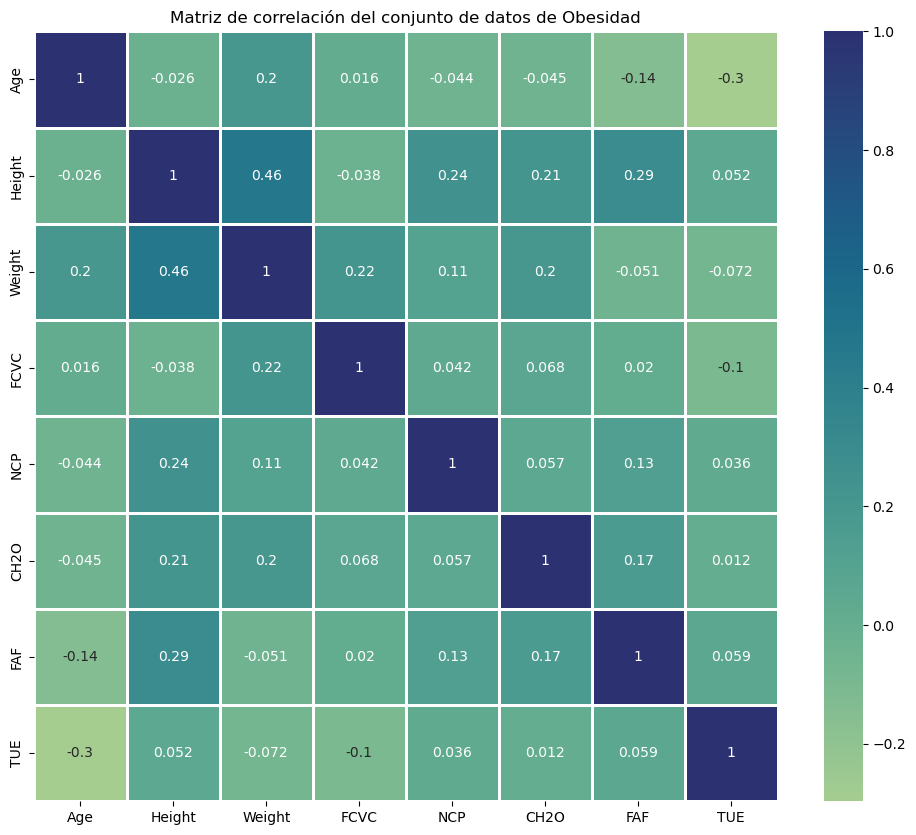

In [34]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_numeric.corr(),
           annot = True,
           cmap = "crest",
           linewidths = 2, 
           linecolor = "white")
plt.title("Matriz de correlación del conjunto de datos de Obesidad")
plt.show()

Analisis de las estadisticas:

Aunque en los diagramas de caja se observan multiples datos atipicos para la variable edad, estos no beden considerarse pues una edad alta, superior a 40 o 50 años no se trata de un dato atipico en este caso. Para las variables estatura y peso se observa solo un dato atipico en cada variable. Los otros gráficos no serian concluyendes debido a que ocmo se explico previamente son variables categoricas que se convirtieron a numericas y tienen varios datos de ruido.

Tambien se puede apreciar que la correlación entre las variables numericas es muy baja, por lo que todas estas variables se mantendran hasta el momento.


4. Codificación de variables categoricas

In [37]:
df_dummies = pd.get_dummies(df[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])

In [38]:
df_lab = df[["NObeyesdad"]]

In [39]:
df_concatenated = pd.concat([df_numeric, df_dummies, df_lab], axis = 1)

In [40]:
df_concatenated.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,True,False,...,False,False,False,True,False,False,False,True,False,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,True,False,...,False,False,True,False,False,False,False,True,False,Normal_Weight
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,False,True,...,False,True,False,False,False,False,False,True,False,Normal_Weight
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,False,True,...,False,True,False,False,False,False,False,False,True,Overweight_Level_I
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,False,True,...,False,False,True,False,False,False,False,True,False,Overweight_Level_II


In [41]:
# Separación de variables y objetivo (aprovecharemos para eliminar del dataset de variables la altura y el peso)
df_label = df_concatenated["NObeyesdad"]
df_features = df_concatenated.drop(["NObeyesdad","Height","Weight"], axis = 1)

In [42]:
df_label

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [43]:
# Para iniciar el procesamiento debemos convertir a valores numericos nuestras variables
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   FCVC                                2111 non-null   float64
 2   NCP                                 2111 non-null   float64
 3   CH2O                                2111 non-null   float64
 4   FAF                                 2111 non-null   float64
 5   TUE                                 2111 non-null   float64
 6   Gender_Female                       2111 non-null   bool   
 7   Gender_Male                         2111 non-null   bool   
 8   family_history_with_overweight_no   2111 non-null   bool   
 9   family_history_with_overweight_yes  2111 non-null   bool   
 10  FAVC_no                             2111 non-null   bool   
 11  FAVC_yes                            2111 no

In [44]:
df_features = df_features.astype("float")

In [45]:
df_features.dtypes

Age                                   float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                         float64
Gender_Male                           float64
family_history_with_overweight_no     float64
family_history_with_overweight_yes    float64
FAVC_no                               float64
FAVC_yes                              float64
CAEC_Always                           float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
SMOKE_no                              float64
SMOKE_yes                             float64
SCC_no                                float64
SCC_yes                               float64
CALC_Always                           float64
CALC_Frequently                   

In [46]:
# escalar
df_features_scaled = MinMaxScaler().fit_transform(df_features)

In [47]:
df_features_scaled.min(axis = 1), df_features_scaled.max(axis = 1)

(array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]))

In [48]:
# codificación de variable objetivo
encoder = LabelEncoder()

In [49]:
encoder.fit(df_label)

LabelEncoder()

In [50]:
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [51]:
df_labels_encoded = encoder.transform(df_label)

In [52]:
df_labels_encoded

array([1, 1, 1, ..., 4, 4, 4])

5. Implementación de K-Means - Clustering

In [96]:
df_cls=pd.concat([df_numeric, df_lab], axis = 1)

In [98]:
df_cls

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,Normal_Weight
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,Normal_Weight
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,Normal_Weight
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,Overweight_Level_I
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,Obesity_Type_III
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,Obesity_Type_III
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,Obesity_Type_III
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,Obesity_Type_III


In [100]:
encoder.fit(df_cls['NObeyesdad'])

LabelEncoder()

In [102]:
df_cls['NObeyesdad'] = encoder.transform(df_cls['NObeyesdad'])

In [104]:
df_cls

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,5
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,6
...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,4
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,4
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,4
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,4


In [106]:
print(df_cls.groupby('NObeyesdad').size())

NObeyesdad
0    272
1    287
2    351
3    297
4    324
5    290
6    290
dtype: int64


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

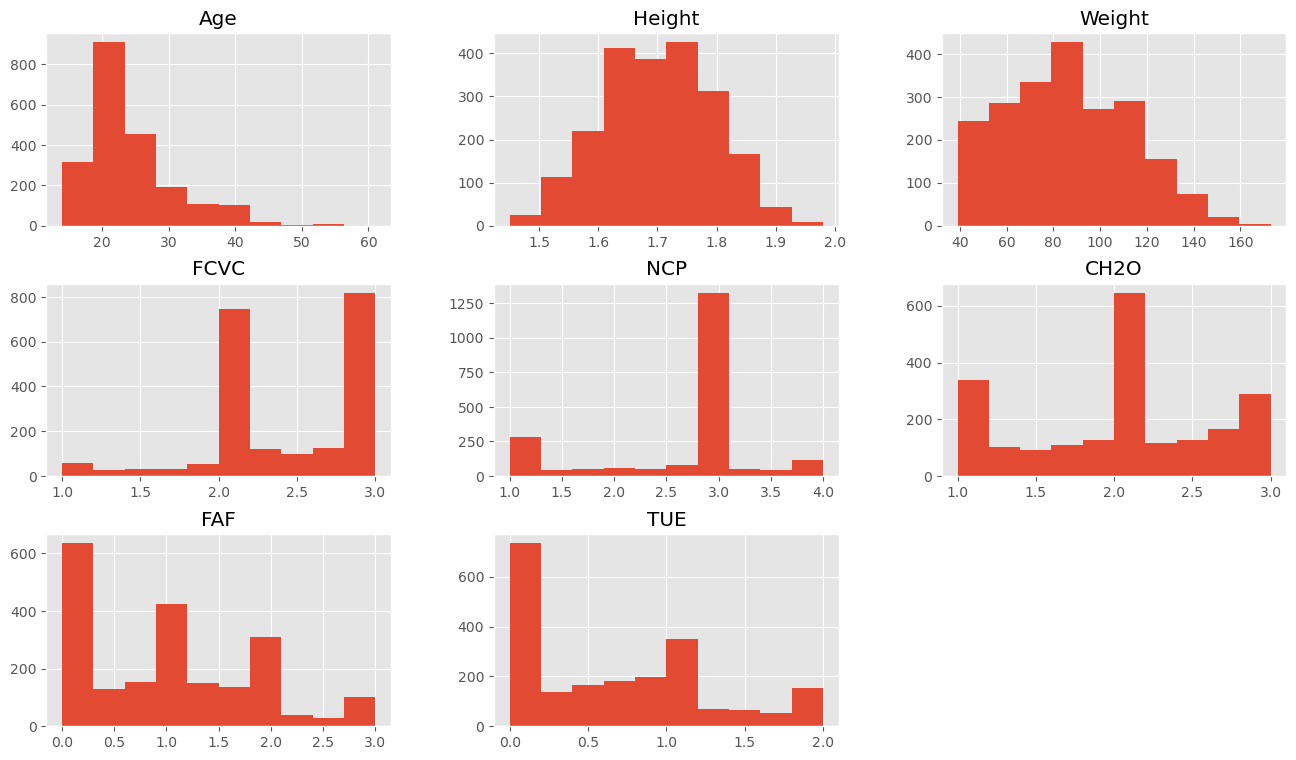

In [118]:
df_cls.drop(['NObeyesdad'], axis=1).hist()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


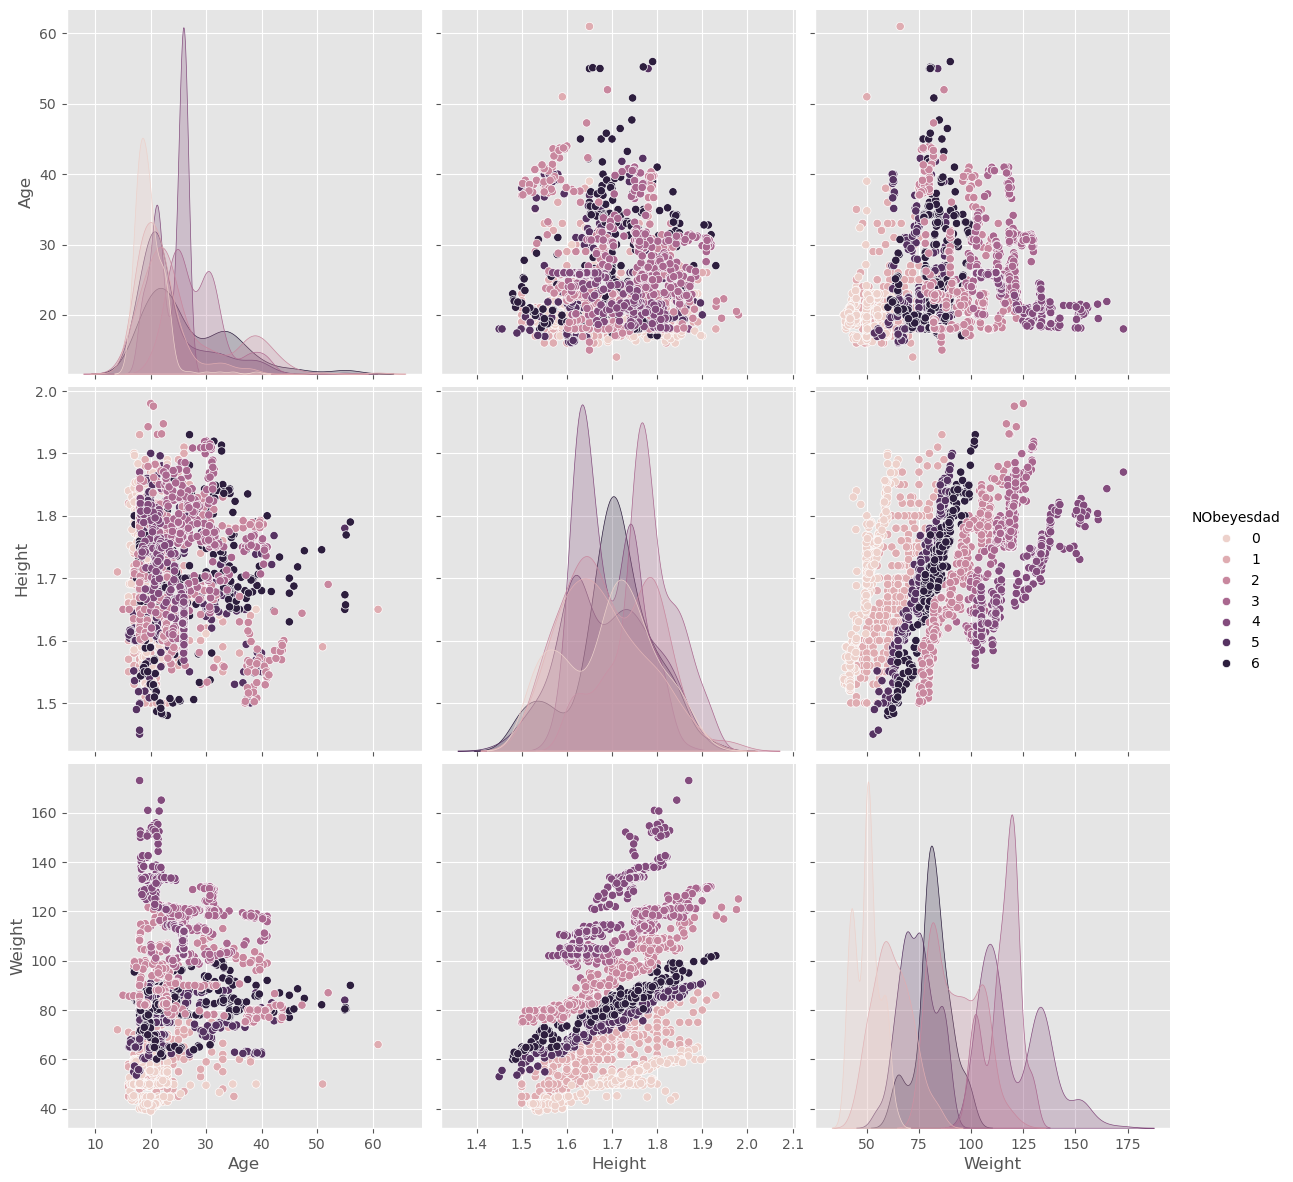

In [120]:
sb.pairplot(df_cls.dropna(), hue='NObeyesdad',size=4,vars=["Age","Height","Weight"],kind='scatter')

In [122]:
X = np.array(df_cls[["Age","Height","Weight"]])
y = np.array(df_cls['NObeyesdad'])
X.shape

(2111, 3)

In [124]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

<Figure size 1600x900 with 0 Axes>

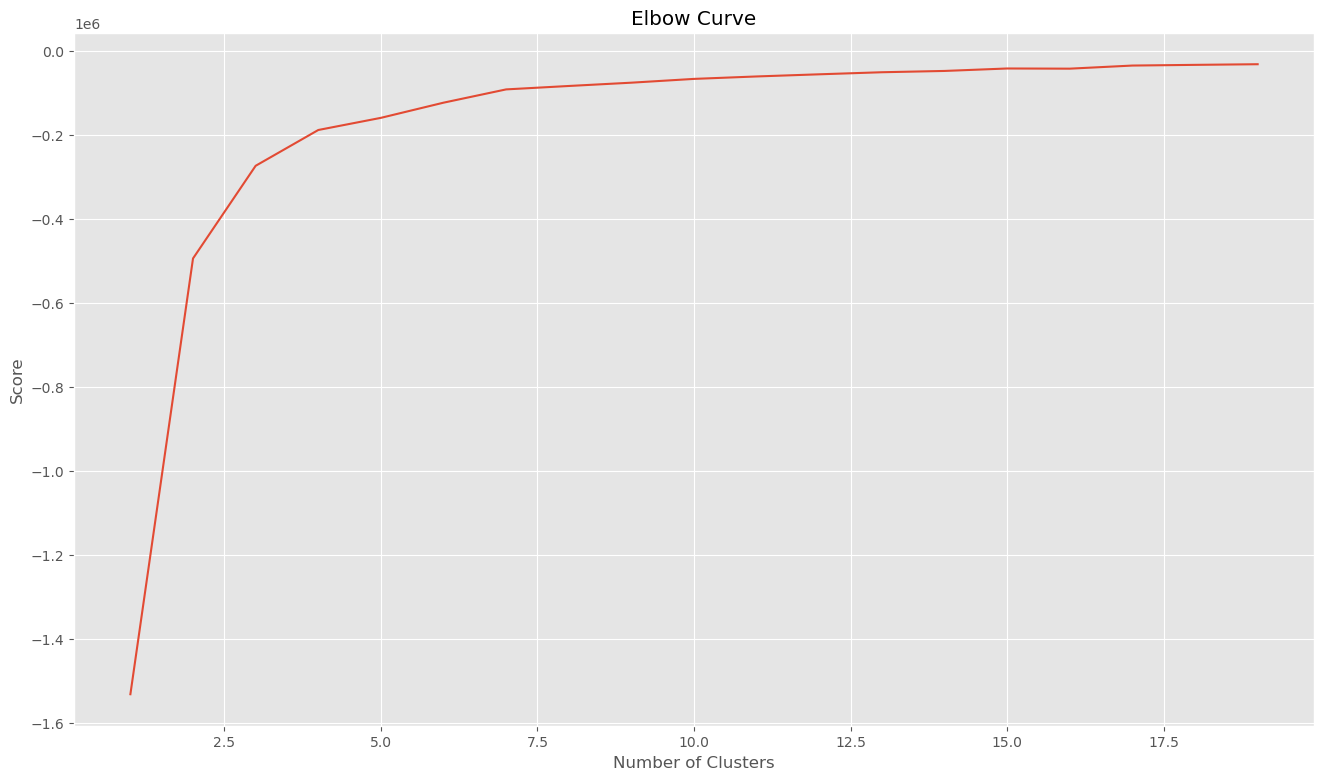

In [126]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [128]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 26.79141325   1.70408108  83.56429712]
 [ 20.13430339   1.64625443  50.0723526 ]
 [ 22.5575814    1.78952176 131.94576904]
 [ 22.09435988   1.66748018  67.04297922]
 [ 26.65398747   1.72360068 108.83231275]]


In [130]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

<Figure size 1600x900 with 0 Axes>

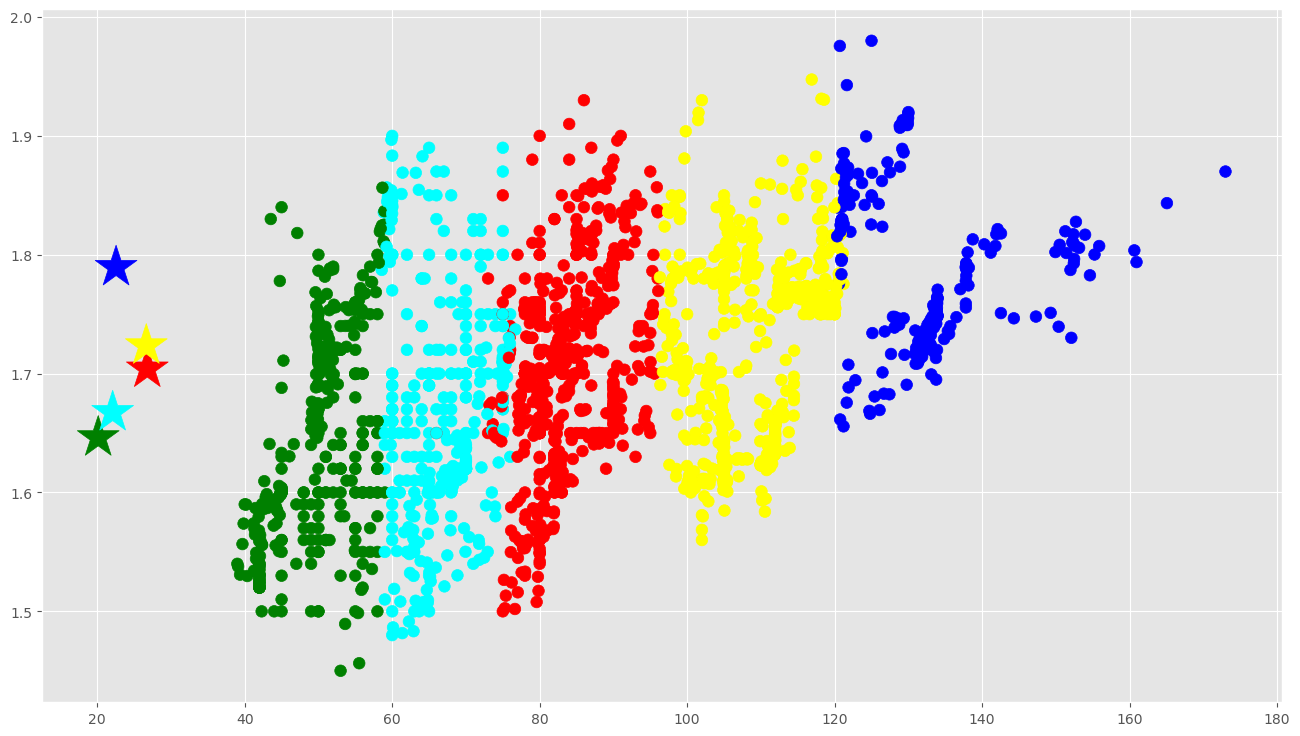

In [134]:
# Getting the values and plotting it
f1 = df_cls['Weight'].values
f2 = df_cls['Height'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

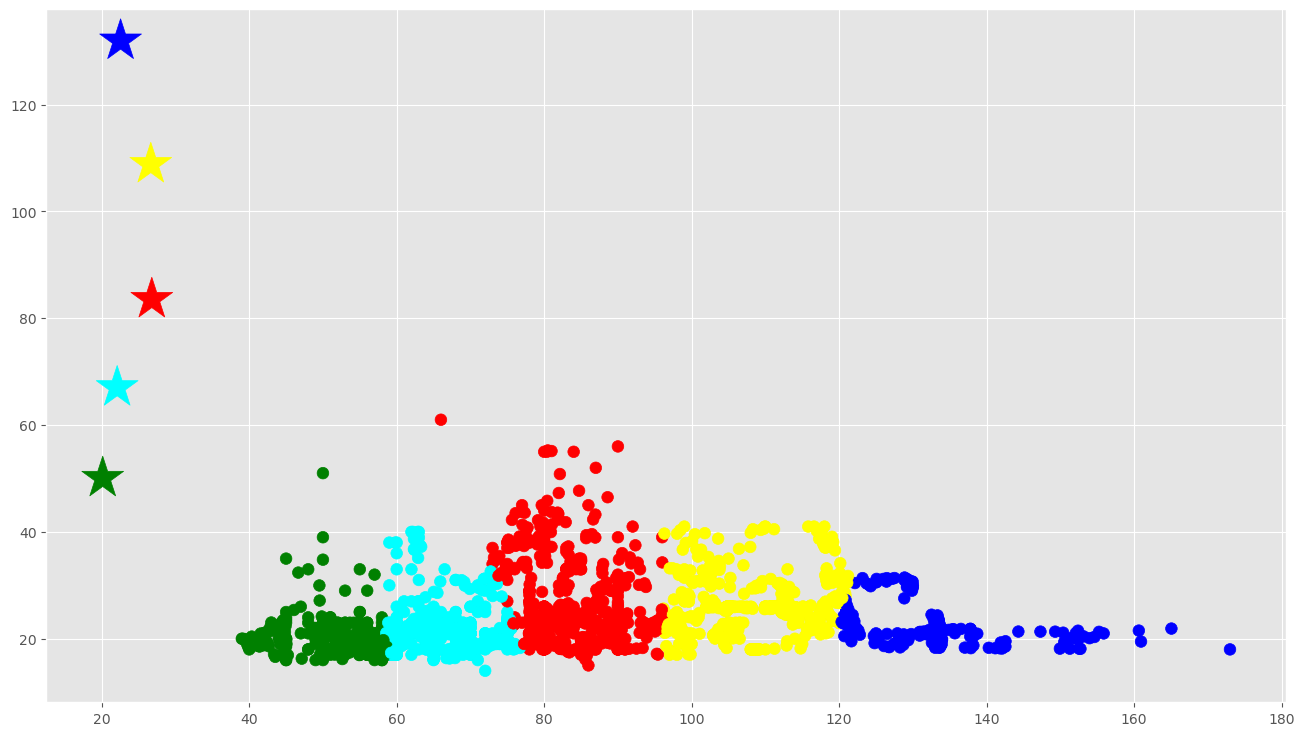

In [136]:
# Getting the values and plotting it
f1 = df_cls['Weight'].values
f2 = df_cls['Age'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

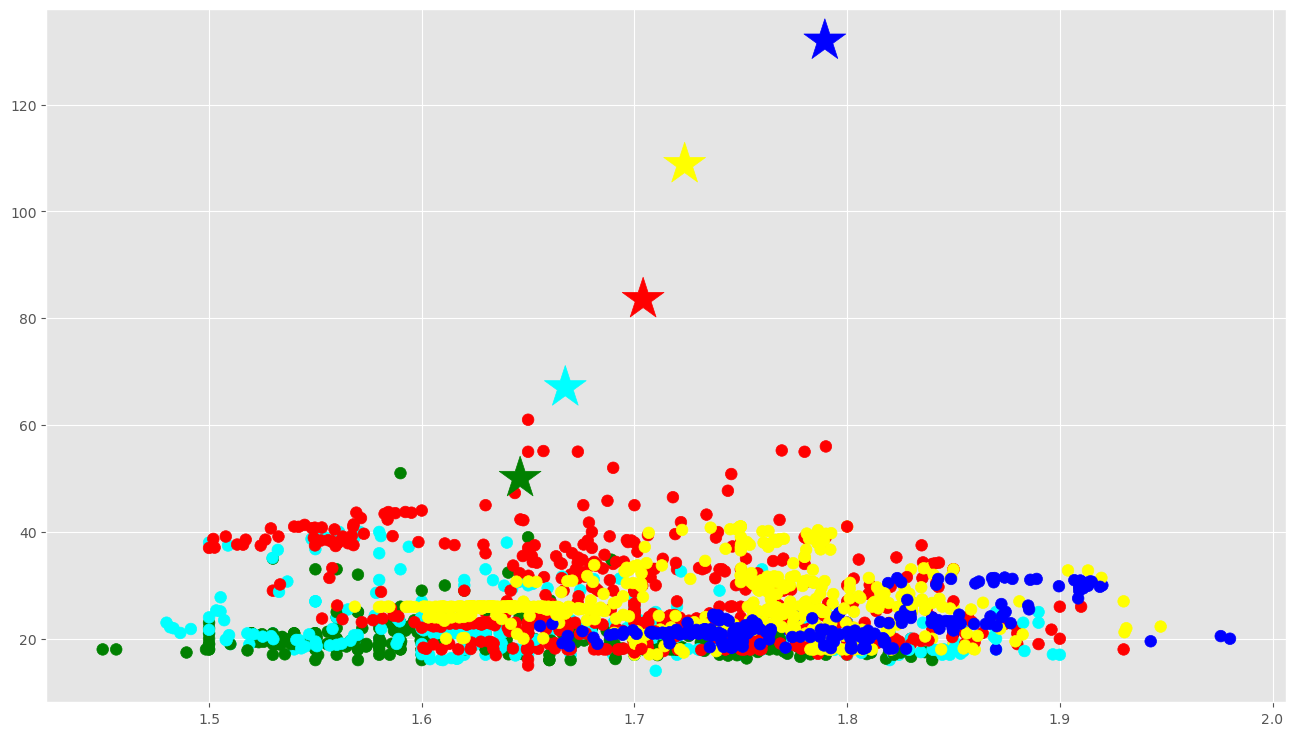

In [138]:
f1 = df_cls['Height'].values
f2 = df_cls['Age'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [182]:
copy =  pd.DataFrame()
copy['FCVC']=df_cls['FCVC'].values
copy['NObeyesdad']=df_cls['NObeyesdad'].values
copy['label'] = labels;dGrupo

NameError: name 'dGrupo' is not defined

In [184]:
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,586
1,green,359
2,blue,222
3,cyan,388
4,yellow,556


In [186]:
group_referrer_index = labels ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['NObeyesdad']=[0,1,2,3,4,5,6]
diversidadGrupo['cantidad']=group_referrals.groupby('NObeyesdad').size()
diversidadGrupo

,NObeyesdad,cantidad
0,0,NaN
1,1,25.0
2,2,211.0
3,3,1.0
4,4,NaN
5,5,122.0
6,6,227.0
